In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
%matplotlib inline

# Load and visualize data

In [ ]:
# Load data
df = pd.read_csv('./data/versicolor/train.csv')

In [ ]:
def plot_keras_model( model=None ):
    plt.clf()
    
    # Calculate the probability on a mesh
    if model is not None:
        petal_width_mesh, petal_length_mesh = \
            np.meshgrid( np.linspace(0,3,100), np.linspace(0,8,100) )
        petal_width_mesh = petal_width_mesh.flatten()
        petal_length_mesh = petal_length_mesh.flatten()
        p = model.predict( np.stack( (petal_width_mesh, petal_length_mesh), axis=1 ) )
        p = p.reshape((100,100))
        # Plot the probability on the mesh
        
        plt.imshow( p.T, extent=[0,3,0,8], origin='lower', 
               vmin=0, vmax=1, cmap='RdBu', aspect='auto', alpha=0.7 )
    
    # Plot the data points
    plt.scatter( df['petal width (cm)'], df['petal length (cm)'], c=df['versicolor'], cmap='RdBu')
    plt.xlabel('petal width (cm)')
    plt.ylabel('petal length (cm)')
    cb = plt.colorbar()
    cb.set_label('versicolor')

In [ ]:
plot_keras_model()

# Single layer network

In [ ]:
# Build the model
single_layer_model = Sequential()
single_layer_model.add( Dense( output_dim=1, input_dim=2 ) )
single_layer_model.add( Activation( 'sigmoid' ) )

In [ ]:
# Compile the model
single_layer_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.1), metrics=['accuracy'])

In [ ]:
# Train it
X = df[['petal width (cm)', 'petal length (cm)']].values
y = df['versicolor'].values
single_layer_model.fit( X, y, batch_size=16, nb_epoch=600, verbose=0 )

In [ ]:
plot_keras_model( model=single_layer_model )

# Two layer network

In [ ]:
# Build the model
two_layer_model = Sequential()
two_layer_model.add( Dense( output_dim=8, input_dim=2 ) )
two_layer_model.add( Activation( 'sigmoid' ) )
two_layer_model.add( Dense( output_dim=1, input_dim=8 ) )
two_layer_model.add( Activation( 'sigmoid' ) )

In [ ]:
# Compile the model
two_layer_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.1), metrics=['accuracy'])

In [ ]:
# Train it
X = df[['petal width (cm)', 'petal length (cm)']].values
y = df['versicolor'].values
two_layer_model.fit( X, y, batch_size=16, nb_epoch=600, verbose=0 )

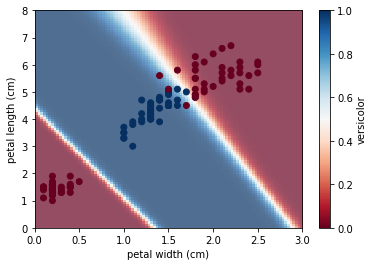

In [13]:
plot_keras_model( model=two_layer_model )